In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL  # Python Imaging Library
import tensorflow as tf


from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import  Sequential

In [2]:
import pathlib
dataset_url="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=tf.keras.utils.get_file('flower_photos.tar',origin=dataset_url,extract=True)
data_dir=pathlib.Path(data_dir).with_suffix('')

228813984/228813984 [==============================] - 3s 0us/step


In [3]:
image_count=len(list(data_dir.glob("*/*.jpg")))
print(image_count)

3670


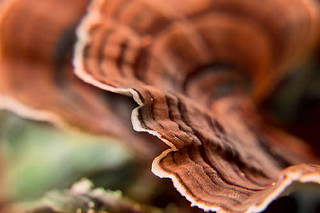

In [4]:
roses=list(data_dir.glob("roses/*"))
PIL.Image.open(str(roses[1]))

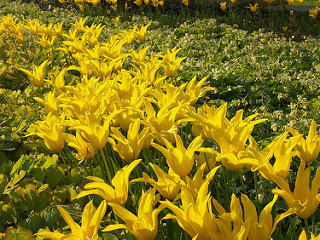

In [5]:
tulips=list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulips[100]))

In [6]:
batch_size=32
img_height=180
img_width=180

In [7]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [8]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [9]:
class_names=train_ds.class_names
class_names

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

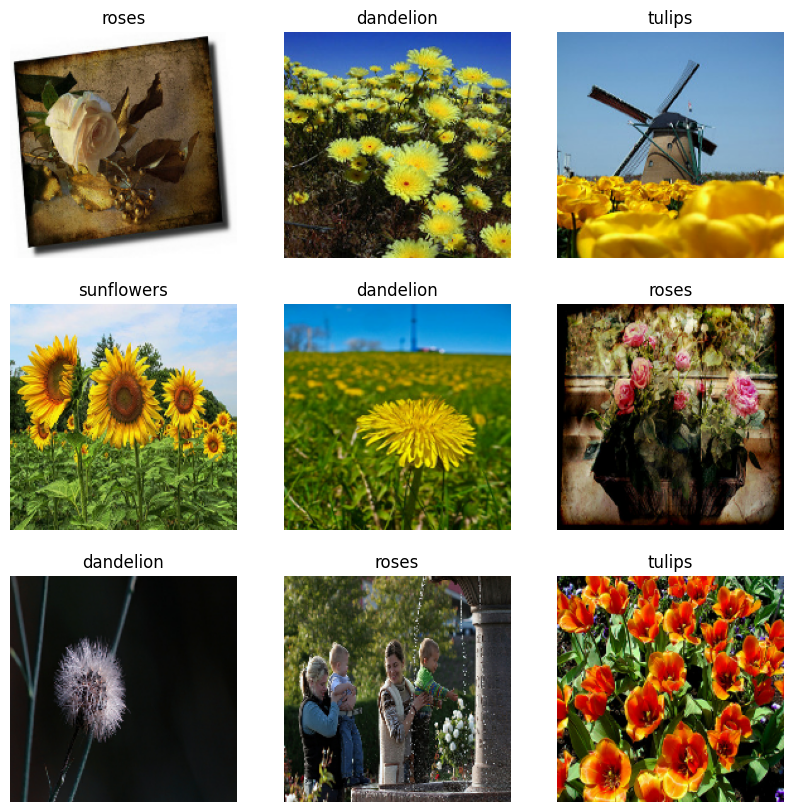

In [10]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE=tf.data.AUTOTUNE

train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer=layers.Rescaling(1./255)

In [14]:
num_classes=len(class_names)

model= Sequential([
    layers.Rescaling(1./255,input_shape=(img_height,img_width,3)),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
              )

In [17]:
epochs=10
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/10
92/92 [==============================] - 13s 41ms/step - loss: 1.3532 - accuracy: 0.4121 - val_loss: 1.0579 - val_accuracy: 0.5940
Epoch 2/10
92/92 [==============================] - 2s 21ms/step - loss: 1.0157 - accuracy: 0.6114 - val_loss: 1.0213 - val_accuracy: 0.5995
Epoch 3/10
92/92 [==============================] - 2s 19ms/step - loss: 0.8209 - accuracy: 0.6798 - val_loss: 0.8540 - val_accuracy: 0.6621
Epoch 4/10
92/92 [==============================] - 2s 19ms/step - loss: 0.6119 - accuracy: 0.7786 - val_loss: 0.9616 - val_accuracy: 0.6185
Epoch 5/10
92/92 [==============================] - 2s 19ms/step - loss: 0.4323 - accuracy: 0.8386 - val_loss: 0.9476 - val_accuracy: 0.6608
Epoch 6/10
92/92 [==============================] - 2s 19ms/step - loss: 0.2698 - accuracy: 0.9077 - val_loss: 1.2168 - val_accuracy: 0.6090
Epoch 7/10
92/92 [==============================] - 2s 21ms/step - loss: 0.1652 - accuracy: 0.9523 - val_loss: 1.3822 - val_accuracy: 0.6499
Epoch 8/10
9

In [18]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)

Text(0.5, 1.0, 'Training and Validation Loss')

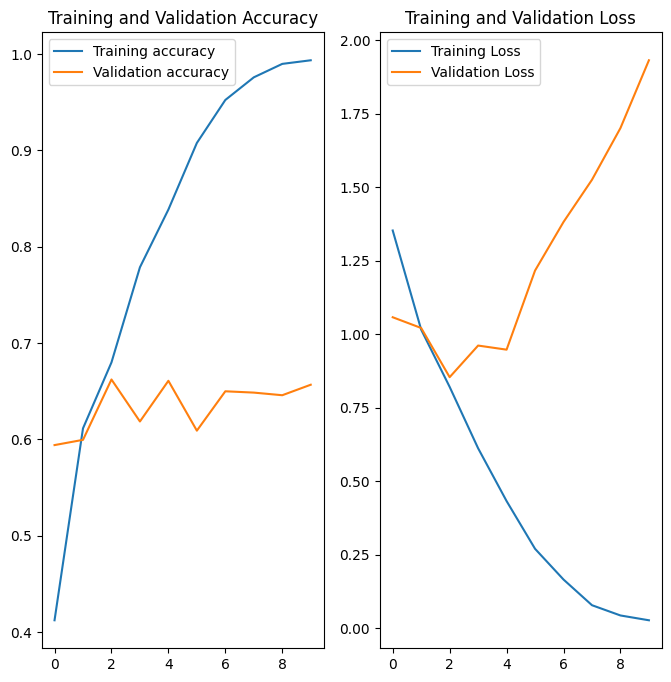

In [19]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training accuracy")
plt.plot(epochs_range,val_acc,label="Validation accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

In [20]:
data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

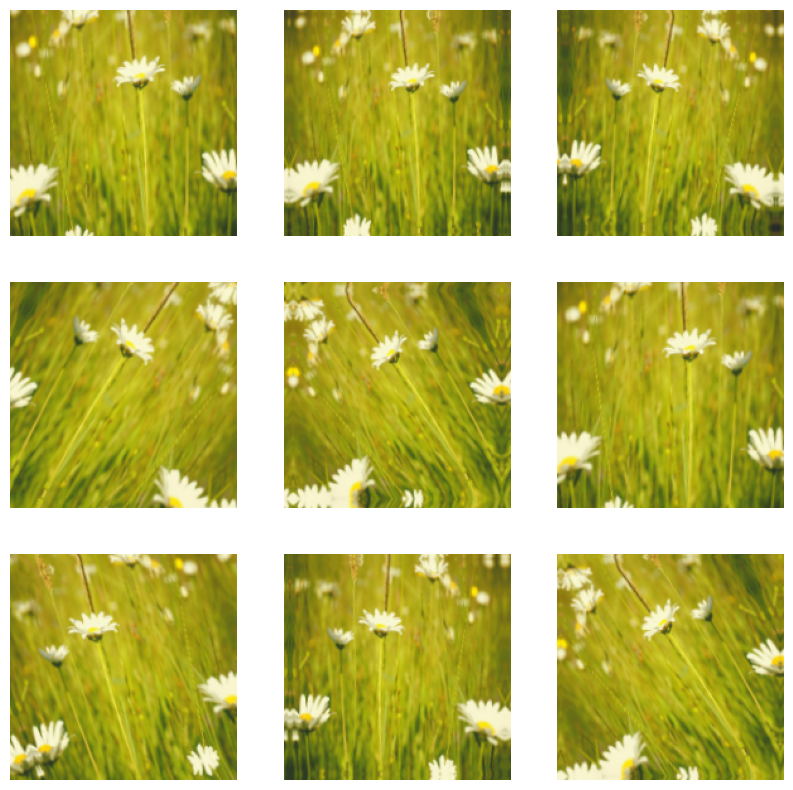

In [21]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images=data_augmentation(images)
        ax=plt.subplot(3,3,i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis("off")

In [22]:
model=Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(16,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(num_classes,name='outputs')
])

In [23]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
epochs=15
history=model.fit(train_ds,validation_data=val_ds,epochs=epochs)

Epoch 1/15
92/92 [==============================] - 7s 30ms/step - loss: 1.4100 - accuracy: 0.3842 - val_loss: 1.2832 - val_accuracy: 0.4755
Epoch 2/15
92/92 [==============================] - 3s 27ms/step - loss: 1.1252 - accuracy: 0.5426 - val_loss: 1.0934 - val_accuracy: 0.5572
Epoch 3/15
92/92 [==============================] - 3s 29ms/step - loss: 1.0085 - accuracy: 0.5971 - val_loss: 0.9880 - val_accuracy: 0.6104
Epoch 4/15
92/92 [==============================] - 3s 29ms/step - loss: 0.9171 - accuracy: 0.6424 - val_loss: 0.8936 - val_accuracy: 0.6322
Epoch 5/15
92/92 [==============================] - 3s 28ms/step - loss: 0.8717 - accuracy: 0.6553 - val_loss: 0.9618 - val_accuracy: 0.6322
Epoch 6/15
92/92 [==============================] - 3s 28ms/step - loss: 0.8323 - accuracy: 0.6768 - val_loss: 0.8846 - val_accuracy: 0.6417
Epoch 7/15
92/92 [==============================] - 3s 30ms/step - loss: 0.7769 - accuracy: 0.7010 - val_loss: 0.8448 - val_accuracy: 0.6798
Epoch 8/15
92

Text(0.5, 1.0, 'Training and Validation Loss')

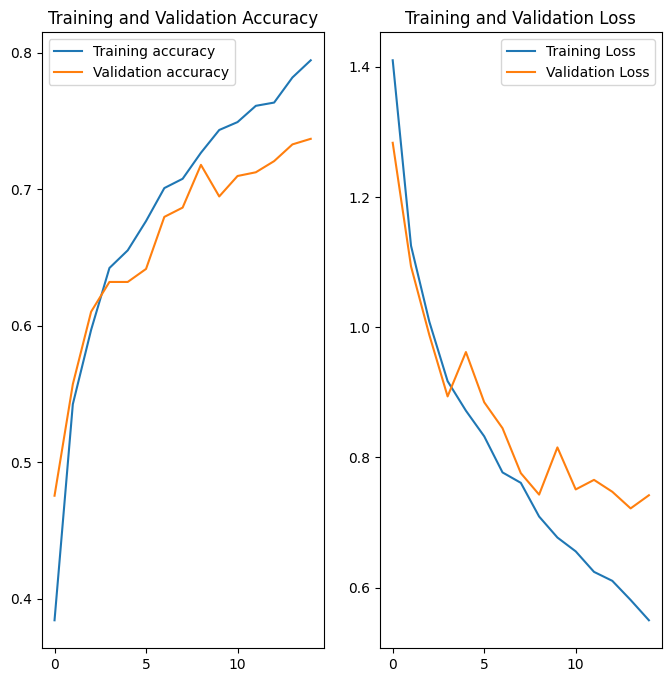

In [26]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label="Training accuracy")
plt.plot(epochs_range,val_acc,label="Validation accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label="Training Loss")
plt.plot(epochs_range,val_loss,label="Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")

In [27]:
test_url="https://nurserylive.com/cdn/shop/products/nurserylive-plants-rose-red-plant-16969265840268_700x700.jpg"
test_path=tf.keras.utils.get_file(origin=test_url)

img=tf.keras.utils.load_img(test_path, target_size=(img_height,img_width))
img_array=tf.keras.utils.img_to_array(img)
img_array=tf.expand_dims(img_array,0)

predictions=model.predict(img_array)
score=tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} category with a {:.2f} percent confidence"
    .format(class_names[np.argmax(score)],100*np.max(score))
)

1/1 [==============================] - 0s 415ms/step
This image most likely belongs to roses category with a 99.76 percent confidence
